# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Here we will be experimenting with 3 algorithms

1)KNeighborsClassifier
2)DecisionTreeClassifier
3)RandomForestClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv(r'heart1.csv')

In [4]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Feature Selection

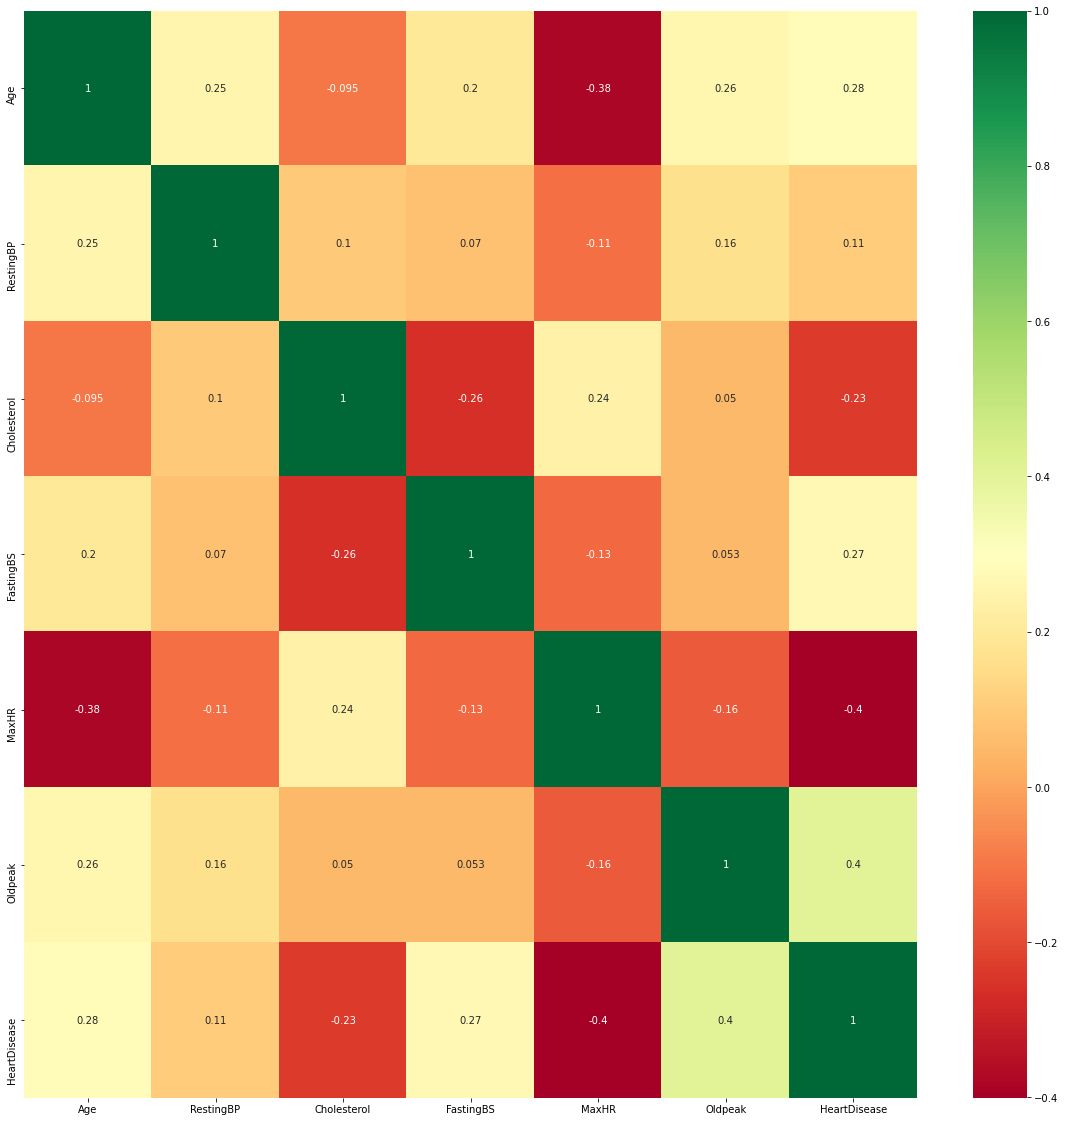

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
cor_target = abs(corrmat['HeartDisease'])

relevant_features = cor_target[cor_target>0.2]

names = [index for index, value in relevant_features.iteritems()]

names.remove('HeartDisease')

print(names)
print(len(names))

['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
5


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

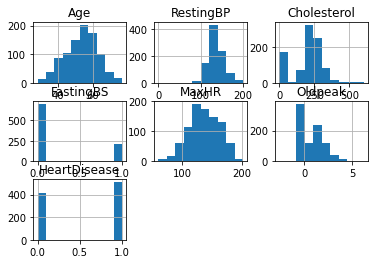

In [9]:
plt.figure(figsize=(20,20))
df.hist()


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

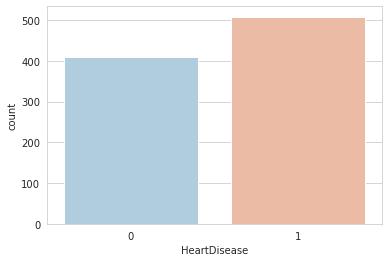

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [33]:
df.head(25)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.574853,1.113245,0,1,1.406111,0,-0.872463,2,0
1,-0.478484,0,2,1.568401,-0.709248,0,1,0.763697,0,0.120373,1,1
2,-1.751359,1,1,-0.134823,1.011049,0,2,-1.524902,0,-0.872463,2,0
3,-0.584556,0,0,0.432918,-0.164204,0,1,-1.163544,1,0.616791,1,1
4,0.051881,1,2,1.142595,-0.487824,0,1,-0.601432,0,-0.872463,2,0
5,-1.539213,1,2,-0.773532,1.828616,0,1,1.325809,0,-0.872463,2,0
6,-0.902775,0,1,-0.134823,0.227547,0,1,1.325809,0,-0.872463,2,0
7,0.051881,1,1,-1.341273,-0.266399,0,1,0.201585,0,-0.872463,2,0
8,-1.751359,1,0,0.574853,-0.283432,0,1,-0.280225,1,0.616791,1,1
9,-0.584556,0,1,-0.773532,1.028081,0,1,-0.681734,0,-0.872463,2,0


In [14]:
# dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df['ChestPainType'].value_counts()
# 0-ASY
# 1-ATA
# 2-NAP
# 3-TA


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2=(df.apply(le.fit_transform))
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [16]:
df = df2

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.574853,1.113245,0,1,1.406111,0,-0.872463,2,0
1,-0.478484,0,2,1.568401,-0.709248,0,1,0.763697,0,0.120373,1,1
2,-1.751359,1,1,-0.134823,1.011049,0,2,-1.524902,0,-0.872463,2,0
3,-0.584556,0,0,0.432918,-0.164204,0,1,-1.163544,1,0.616791,1,1
4,0.051881,1,2,1.142595,-0.487824,0,1,-0.601432,0,-0.872463,2,0


In [19]:
y = df['HeartDisease']
X = df.drop(['HeartDisease'], axis = 1)

In [20]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

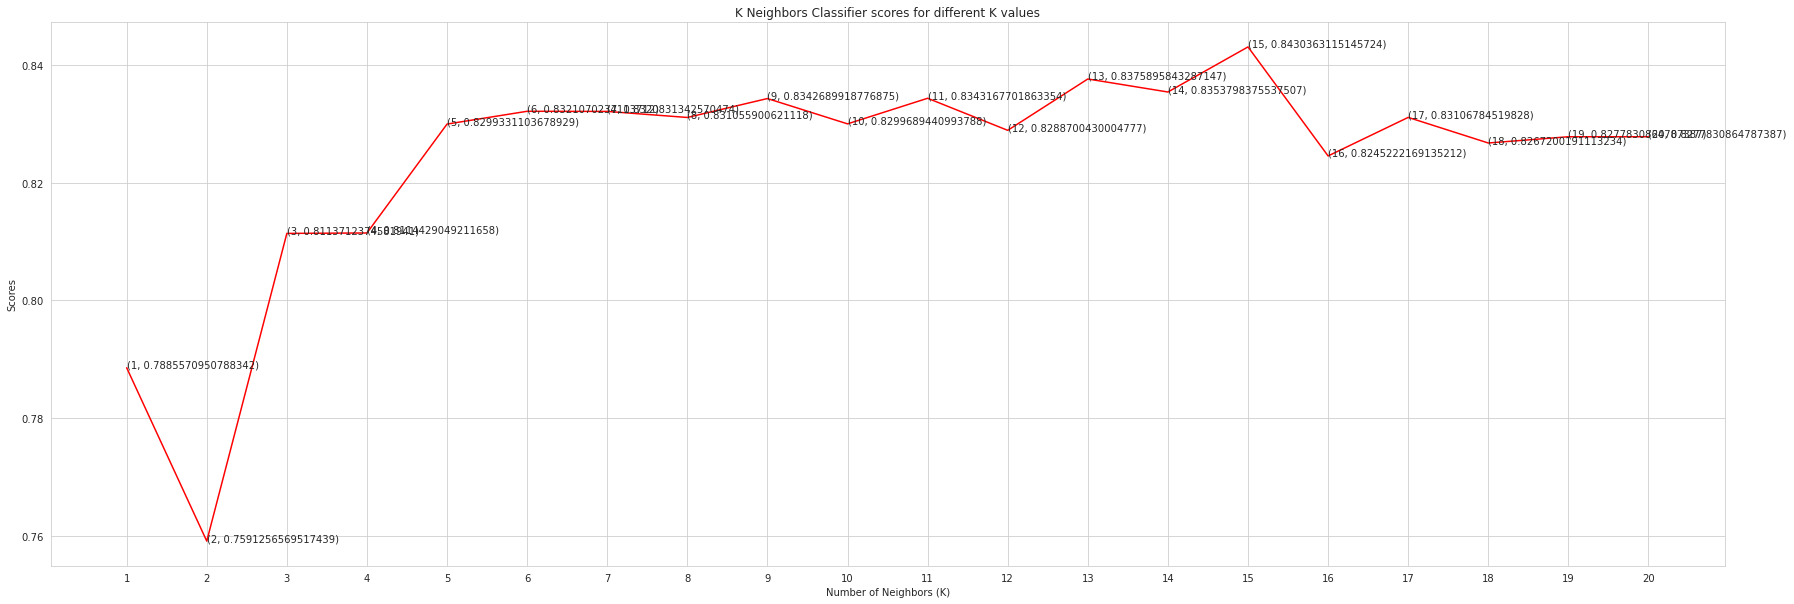

In [21]:
plt.figure(figsize=(30,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [23]:
score.mean()

0.8288700430004777

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(x_test.shape)

(184, 11)


In [26]:
ds_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.8,
                       max_leaf_nodes=45, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

ds_clf.fit(x_train, y_train)
ds_pred = ds_clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

def model_evaluation(y_test, y_pred):
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))    
    print('Precision Score:', precision_score(y_test, y_pred))    
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('f1_score:', f1_score(y_test, y_pred))   

In [28]:
model_evaluation(y_test, ds_pred)

Accuracy Score: 0.8152173913043478
Recall Score: 0.8411214953271028
Precision Score: 0.8411214953271028
Confusion Matrix:
 [[60 17]
 [17 90]]
f1_score: 0.8411214953271028


In [29]:
rf_clf = RandomForestClassifier(max_depth=8, max_features=0.6,
                       min_impurity_decrease=0.01, min_samples_leaf=30,
                       random_state=2)

rf_clf.fit(x_train, y_train)

rf_pred = rf_clf.predict(x_test)

In [30]:
model_evaluation(y_test, rf_pred)

Accuracy Score: 0.8206521739130435
Recall Score: 0.8130841121495327
Precision Score: 0.87
Confusion Matrix:
 [[64 13]
 [20 87]]
f1_score: 0.8405797101449274


In [31]:
import joblib

joblib.dump(ds_clf, 'heart-decTree.pkl')

['heart-decTree.pkl']